In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [7]:
df=df.replace({'?':np.NaN})

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [9]:
#Check null values
df.isnull().sum()

age             0
sex             0
cp              0
trestbps        1
chol           23
fbs             8
restecg         1
thalach         1
exang           1
oldpeak         0
slope         190
ca            291
thal          266
num             0
dtype: int64

In [10]:
df.drop('ca',axis=1,inplace=True)
df.fillna(df.median(),inplace=True)


In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num       '],
      dtype='object')

In [14]:
df=df.rename(columns={"num       ":"num"})

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [16]:
#Data visualization
import seaborn as sns

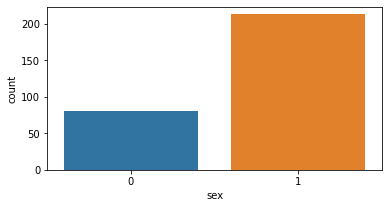

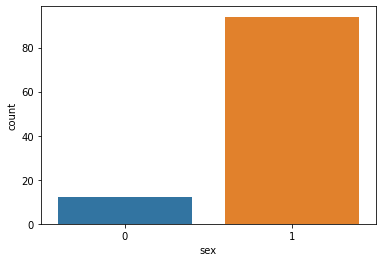

In [20]:
plt.figure(figsize=(6,3))
sns.countplot(df.sex)
plt.show()
sns.countplot(df.sex[df['num']==1])
plt.show()

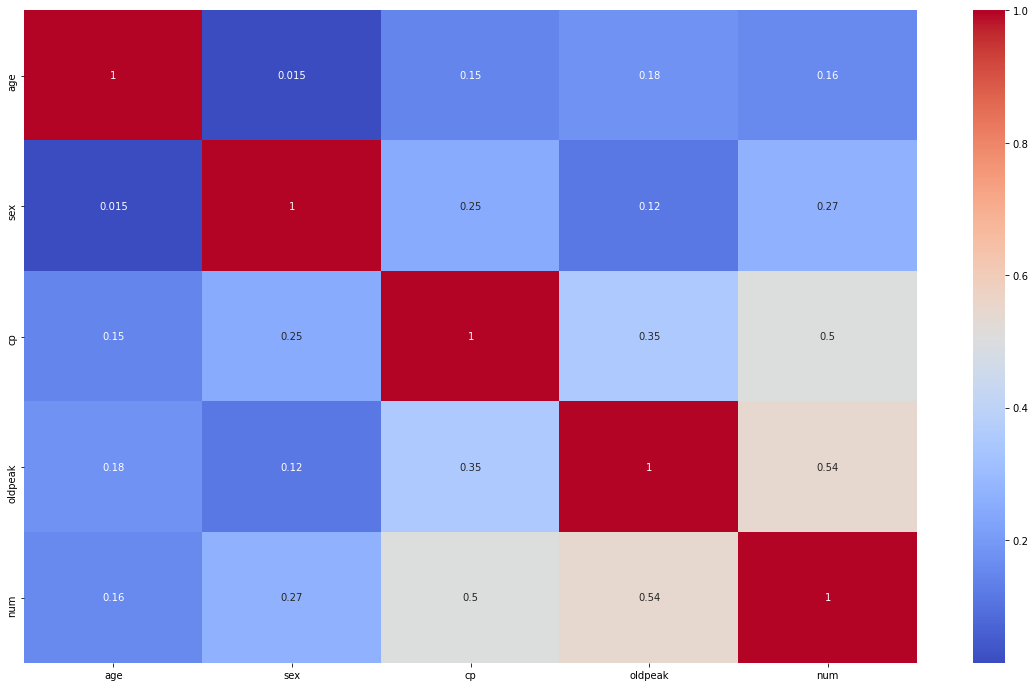

In [22]:
corr=df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

<Figure size 2880x1440 with 0 Axes>

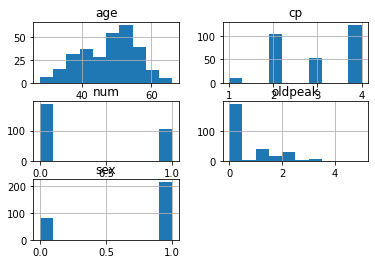

<Figure size 2880x1440 with 0 Axes>

In [26]:
df.hist()
plt.figure(figsize=(40,20))

In [27]:
#SPlit the data 
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop('num',axis=1)
y=df['num']


In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2)


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()
model.fit(X,y)


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
pred=model.predict(x_test)

In [37]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

In [39]:
classification_report(y_test,pred)


'              precision    recall  f1-score   support\n\n           0       0.89      0.92      0.91        52\n           1       0.80      0.73      0.76        22\n\n    accuracy                           0.86        74\n   macro avg       0.84      0.83      0.83        74\nweighted avg       0.86      0.86      0.86        74\n'

In [40]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,2,6,0
1,29,1,2,120,243,0,0,160,0,0.0,2,6,0
2,29,1,2,140,243,0,0,170,0,0.0,2,6,0
3,30,0,1,170,237,0,1,170,0,0.0,2,6,0
4,31,0,2,100,219,0,1,150,0,0.0,2,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,2,6,1
290,54,0,3,130,294,0,1,100,1,0.0,2,6,1
291,56,1,4,155,342,1,0,150,1,3.0,2,6,1
292,58,0,2,180,393,0,0,110,1,1.0,2,7,1


In [41]:
random_pred_1 = model.predict([[52, 1, 4, 160, 331, 0, 0, 94, 1, 2.5, 2, 6]]) #289th col of main data
random_pred_1

array([1], dtype=int64)

In [42]:
random_pred_0 = model.predict([[31, 0, 2, 100, 219, 0, 1, 150, 0, 0.0, 2, 6]]) #4th col of main data
random_pred_0

array([0], dtype=int64)